# Machine Learning Exercise 1 - Linear Regression
This notebook covers a Python-based solution for the first programming exercise of the machine learning class on Coursera. Please refer to the exercise text for detailed descriptions and equations.

In this exercise we'll implement simple linear regression using gradient descent and apply it to an example problem. We'll also extend our implementation to handle multiple variables and apply it to a slightly more difficult example.

## Linear regression with one variable
In the first part of the exercise, we're tasked with implementing linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

Let's start by importing some libraries and examining the data.

In [1]:
# Loads watermark extension and prints details about current platform
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas,matplotlib
%load_ext autoreload
%autoreload 2
 
# import packages
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import functions

# Get project directory
PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
print(PROJ_ROOT)
import sys

# make sure matplotlib will display inline
%matplotlib inline

Sat Sep 09 2017 

CPython 3.6.2
IPython 6.1.0

numpy 1.13.1
scipy 0.19.1
sklearn 0.19.0
pandas 0.20.3
matplotlib 2.0.2

compiler   : GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)
system     : Darwin
release    : 16.4.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
/Users/sebp/Documents/Learning/Classes/ML-Stanford


In [2]:
ex1data1 = os.path.join(PROJ_ROOT, 'hw1', 'matlab', 'ex1data1.txt')
data = pd.read_csv(ex1data1, header=None, names=['Population', 'Profit'])
print (ex1data1)
print ('Number of examples (m):', len(data))
data.head()

/Users/sebp/Documents/Learning/Classes/ML-Stanford/hw1/matlab/ex1data1.txt
Number of examples (m): 97


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).

Let's plot the data out to see what we have.

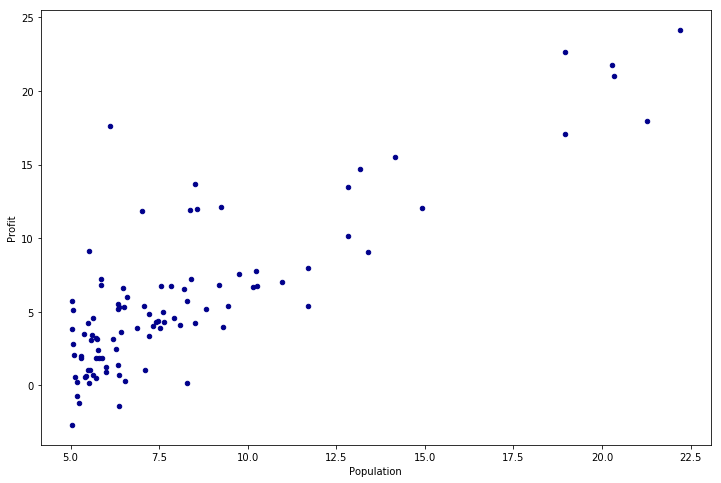

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8), color='DarkBlue')

Lets get ready to compute the Cost Function. First, we need to add a column of 1's to represent the bias unit.

In [5]:
data.insert(0, 'Ones', 1)

Now lets implements gradient descent to minimize the Cost function (J).

In [6]:
def computeCost(X, y, theta):
    error = (X * theta.T) - y
    cost = np.sum(np.power(error, 2))
    return np.sum(cost) / (2 * len(X))

And then lets get the data ready to process.

In [7]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [8]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


The cost function is expecting numpy matrices so lets convert our data from dataframes to matrices.

In [9]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [10]:
theta

matrix([[0, 0]])

Make sure we know what our matrix dimensions are.

In [11]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

And now test the cost function. It should equal about 32.07

In [12]:
computeCost(X, y, theta)

32.072733877455676

Now we need to define a function to perform gradient descent on the parameters theta using the update rules defined in the text. This implementation will be able to handle any n amount of features.

In [13]:
def gradientDescent(X, y, theta, alpha, iters):
    temp_theta = np.matrix(np.zeros(theta.shape))
    cost_history = np.zeros(iters)
    m = len(y)
    parameters = int(theta.ravel().shape[1])
    print (parameters, theta.shape[1], len(theta))
    
    for i in range(iters):
        err = (X*theta.T)-y
        
        # update bias unit
        temp_theta[0,0] = theta[0,0] - (alpha / m) * np.sum(err)
        
        for j in range(1, theta.shape[1]):
            term = np.multiply(err, X[:,j])
            temp_theta[0,j] = theta[0,j] - (alpha / m) * np.sum(term)

        theta = temp_theta
        cost_history[i] = computeCost(X, y, theta)
        
    return theta, cost_history

Let's init some values and test it! we should get an output of [-3.24140214, 1.1272942] for the gradient

In [14]:
alpha = 0.01
iters = 1000
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

2 2 1


matrix([[-3.24140214,  1.1272942 ]])

Plot out the training progress

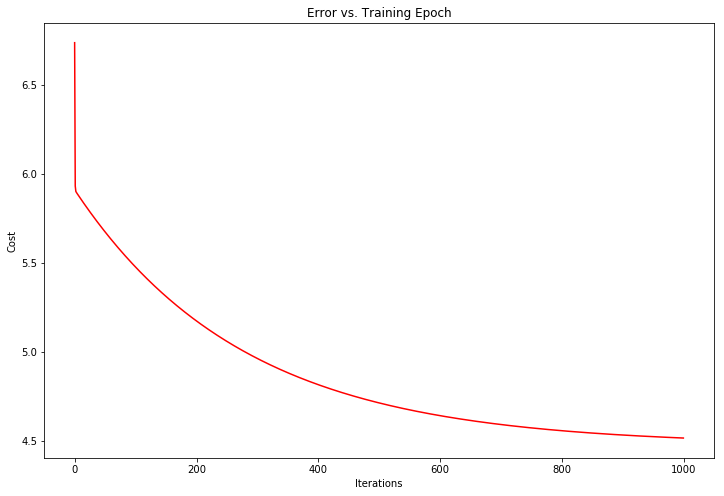

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Now lets compute the final cost, or error, of our model!

In [16]:
computeCost(X, y, g)

4.5159555030789118

And lets plot it out!

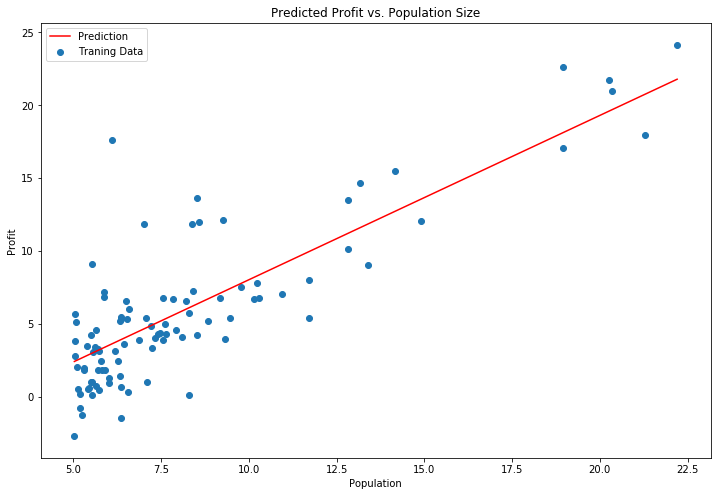

In [17]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

## Linear regression with multiple variables
In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file ex1data2.txt contains a training set of housing prices in Port- land, Oregon. The **first column is the size of the house** (in square feet), the second column is the **number of bedrooms**, and the third column is the **price** of the house.

In [18]:
ex1data2 = os.path.join(PROJ_ROOT, 'hw1', 'matlab', 'ex1data2.txt')
data2 = pd.read_csv(ex1data2, header=None, names=['size', 'bedrooms', 'price'])
print (ex1data1)
print ('Number of examples (m):', len(data2))
data2.head()

/Users/sebp/Documents/Learning/Classes/ML-Stanford/hw1/matlab/ex1data1.txt
Number of examples (m): 47


,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [19]:
data2.describe()

,size,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


### Feature Normalization
This part of the instructions also includes normalizing the features.
- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

In [20]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Repeat preprocessing step from before and call gradientDescent()!

In [21]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

Lets train!

In [22]:
# set parameters
alpha = 0.01
iters = 1500

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

3 3 1


0.13068670606095903

Once again we'll take a look at the training progress

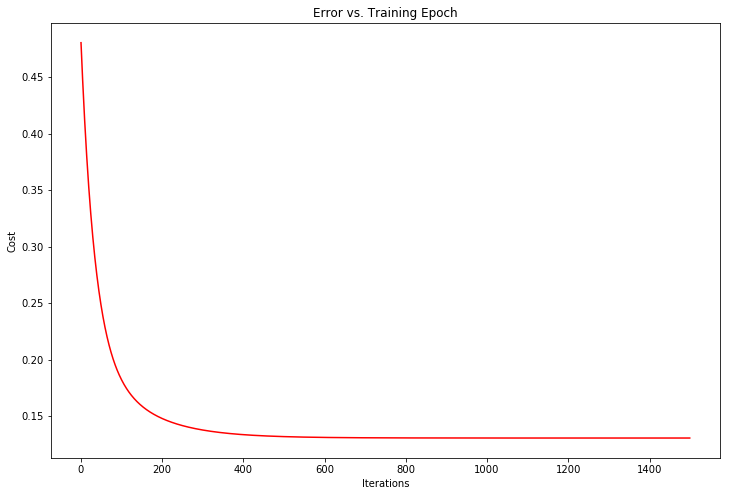

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

## BONUS!
In the original assignment, you're now supposed to play with different learning rates and see their out come. Instead, we will reimplement gradient descent with a decaying learning rate

In [24]:
def gradientDescentDecay(X, y, theta, alpha, decay, iters):
    temp_theta = np.matrix(np.zeros(theta.shape))
    cost_history = np.zeros(iters)
    m = len(y)
    parameters = int(theta.ravel().shape[1])
#     print (parameters, theta.shape[1], len(theta))
    
    for i in range(iters):
        err = (X*theta.T)-y
        
        # update bias unit
        temp_theta[0,0] = theta[0,0] - (alpha / m) * np.sum(err)
        
        for j in range(1, theta.shape[1]):
            term = np.multiply(err, X[:,j])
            temp_theta[0,j] = theta[0,j] - (alpha / m) * np.sum(term)

        alpha = alpha * decay
        theta = temp_theta
        cost_history[i] = computeCost(X, y, theta)
        
    return theta, cost_history

In [25]:
decay_rates =  [0.9, 0.99, 0.999]
learning_rates = [1e-7, 0.1, 0.01, 0.001, 0.0001]
iters = 200

classifiers = {}
best_cost = 1000
best_cost_hist = None
best_lr_decay = None
for lr in learning_rates:
    for decay in decay_rates:
        grad, cost_history = gradientDescentDecay(X2, y2, theta2, lr, decay, iters)
        
        final_cost = computeCost(X2, y2, grad)
        classifiers[(lr, decay)] = final_cost
        
        if final_cost < best_cost:
            best_cost = final_cost
            best_cost_hist = cost_history
            best_lr_decay = (lr, decay)
            
print ('best cost',best_cost)
print ('best learning rate', best_lr_decay[0], 'and best decay', best_lr_decay[1])

best cost 0.130686491916
best learning rate 0.1 and best decay 0.999


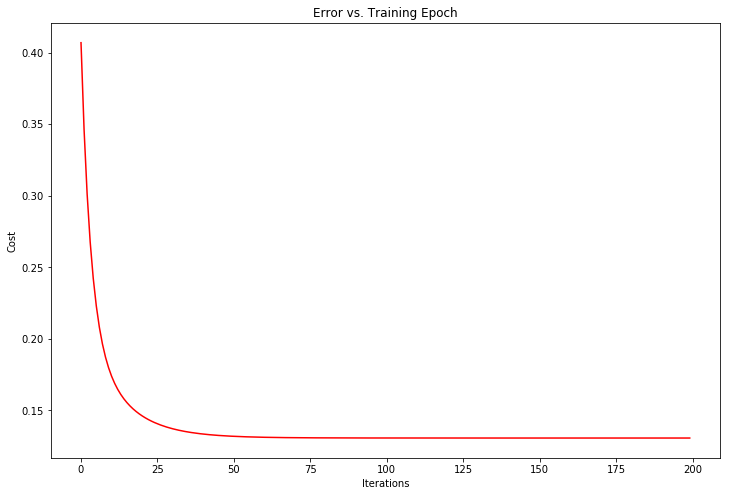

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), best_cost_hist, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Boring old sklearn implementation

In [27]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)
model.predict(X[1,:])

array([[ 2.6989512]])

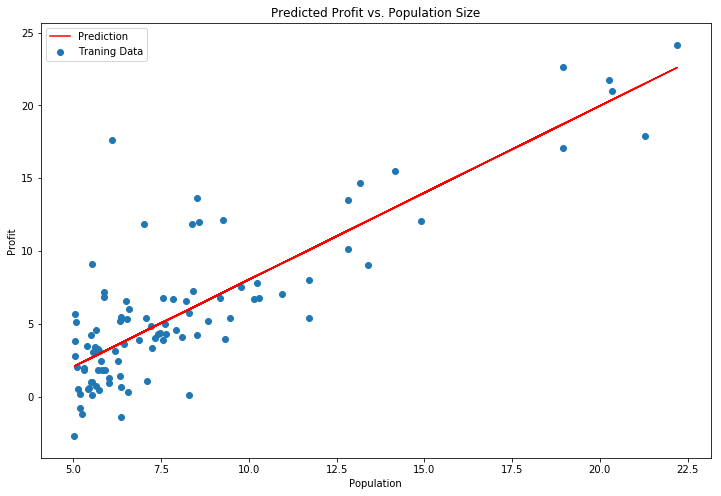

In [28]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

In [29]:
model2 = linear_model.LinearRegression()
model2.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)